In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
df=pd.read_csv('C:\\Users\\sathwik HS\\website\\Automobile.csv')
print(df.head());

                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  


In [10]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000  


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [ ]:
df = df.drop(columns=['name'])
df = df.drop(columns=['origin'])
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)

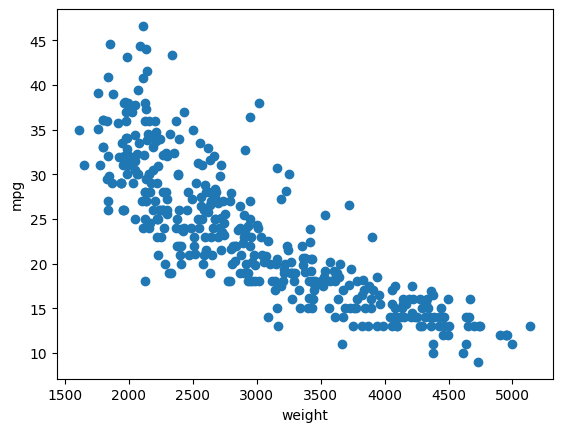

In [15]:
plt.scatter(df['weight'],df['mpg'])
plt.xlabel("weight")
plt.ylabel("mpg")
plt.show()

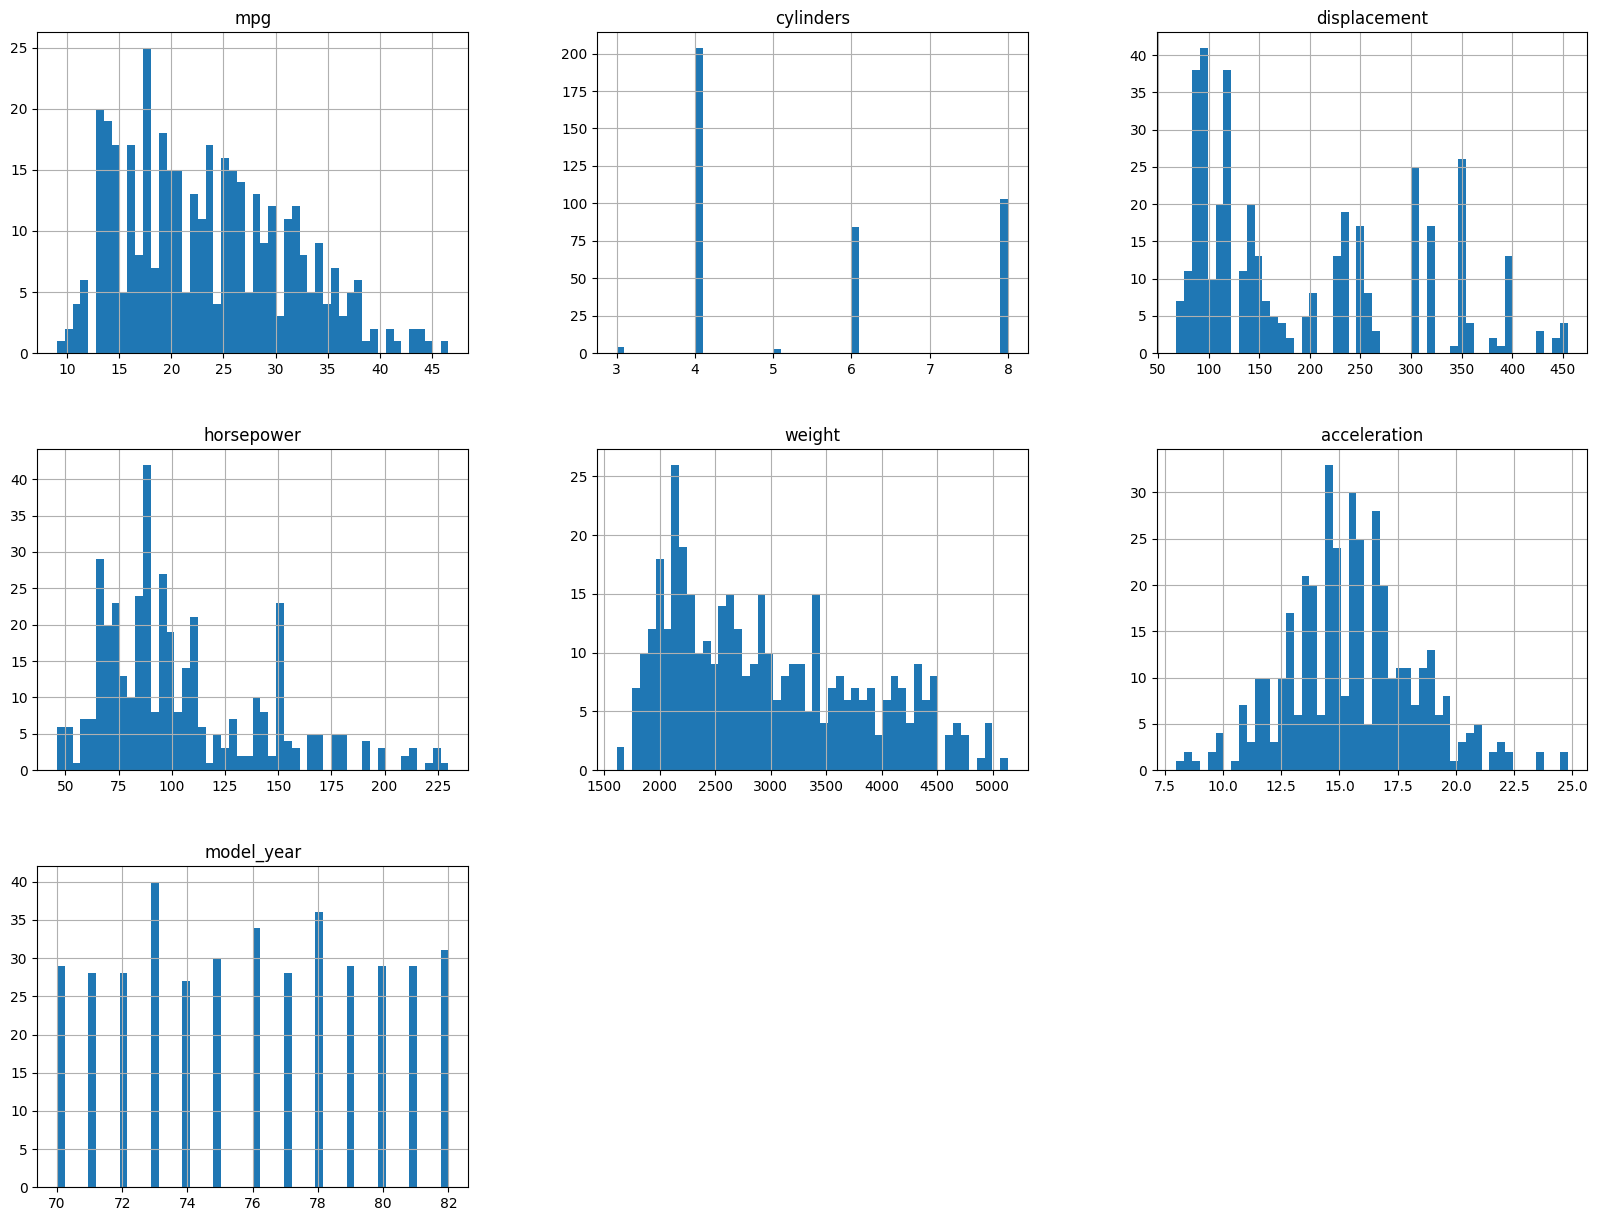

In [16]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [18]:
X = df[['weight']]
Y = df['mpg']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(318, 1)
(318,)
(80, 1)
(80,)


In [19]:
X = df[['weight']]
Y = df['mpg']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

model = LinearRegression()
model.fit(x_train,y_train)
intercept = model.intercept_
slope = model.coef_[0]  

print(f'Intercept: {intercept}')
print(f'Slope (Regression Coefficient): {slope}')

Intercept: 46.5836844059898
Slope (Regression Coefficient): -0.007708964499825924


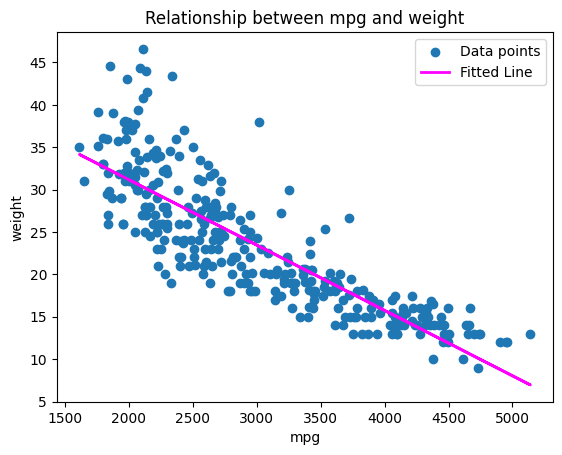

In [20]:
X = df[['weight']]
Y = df['mpg']

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=30)

plt.scatter(x_train,y_train, label='Data points')
plt.plot(x_train, x_train*slope +intercept, '-', color='magenta', linewidth=2, label='Fitted Line')

plt.title("Relationship between mpg and weight")
plt.ylabel("weight")
plt.xlabel("mpg")

plt.legend()
plt.show()

In [21]:
new_car = pd.DataFrame({'weight': [5000]})
new = model.predict(new_car)
print("Predicted value for new observation:", new[0].round(3))

Predicted value for new observation: 8.039


In [22]:
y2=model.predict(x_test)
r_squared = r2_score(y_test,y2)
print("R square value is:",r_squared)

R square value is: 0.6196188408103925
